# Hough transform
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_04_curve_fitting/hough_transform.ipynb)



In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess 
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_04_curve_fitting/edge_bold.bmp'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_04_curve_fitting/building.jpg'.split())



In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

figsize = (10, 10)



## Import an image


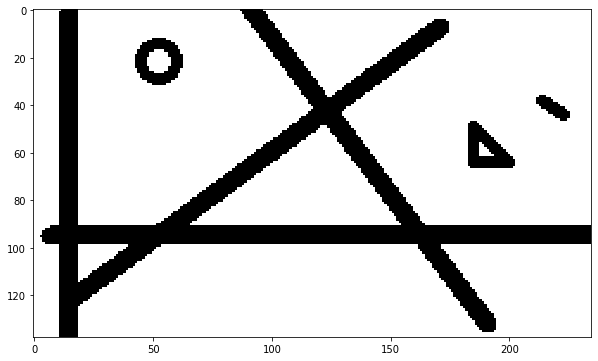

In [3]:
im3 = cv2.imread("edge_bold.bmp")
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()



## Find edges of an image using Canny
For more details about Canny edge detection, look at lecture 3


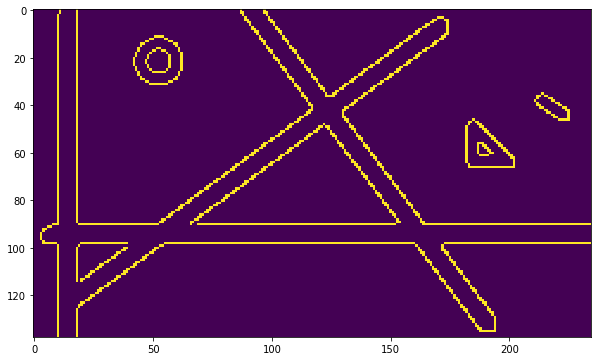

In [4]:
mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()



## Initialize accumulation matrix


In [5]:
# choose R size
r_step = 1
rmax = np.sqrt(im.shape[0]**2+im.shape[1]**2)
r = np.arange(-rmax, rmax, r_step)

# choose theta size
t_step = np.pi/180
t = np.arange(0, np.pi, t_step)

# accumulation matrix
acc_mat = np.zeros((r.shape[0], t.shape[0]))



## Fill accumulation matrix


In [6]:
# get indices of edges
edge_inds = np.argwhere(mag_im > 0)

# run on all theta and edge indices and find corresponding R
for t_ind, t0 in enumerate(t):
    for yx in edge_inds:
        x = yx[1]
        y = yx[0]

        r0 = x*np.cos(t0)+y*np.sin(t0)
        r0 = np.round(r0/r_step)*r_step
        r_ind = np.argmin(np.abs(r0-r))

        acc_mat[r_ind, t_ind] += 1



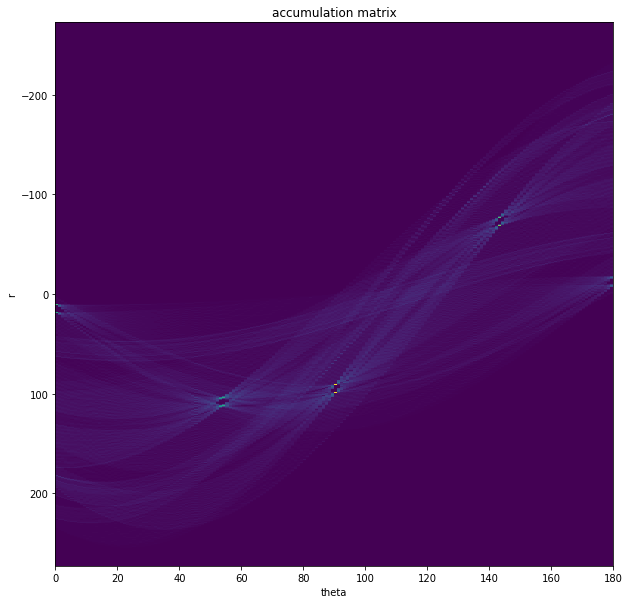

In [7]:
plt.figure(figsize=figsize)
plt.imshow(acc_mat, extent=[0, 180, rmax, -rmax],aspect='auto')
plt.xlabel('theta')
plt.ylabel('r')
plt.title('accumulation matrix')
plt.show()



## Threshold accumulation matrix


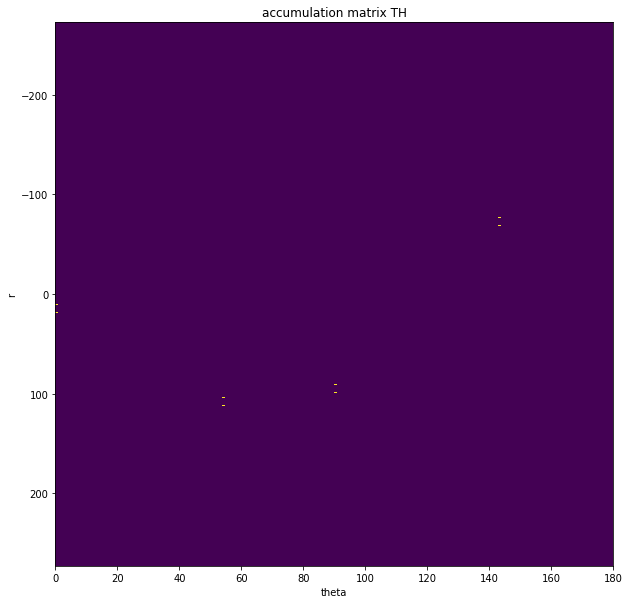

In [8]:
TH = 110
acc_mat_th = acc_mat > TH

plt.figure(figsize=figsize)
plt.imshow(acc_mat_th, extent=[0, 180, rmax, -rmax],aspect='auto')
plt.xlabel('theta')
plt.ylabel('r')
plt.title('accumulation matrix TH')
plt.show()



## Plot lines found by hough


(rho,theta): (-76.52339349127442, 143.0)
(rho,theta): (-68.52339349127442, 143.0)
(rho,theta): (10.476606508725581, 0.0)
(rho,theta): (18.47660650872558, 0.0)
(rho,theta): (90.47660650872558, 90.0)
(rho,theta): (98.47660650872558, 90.0)
(rho,theta): (103.47660650872558, 54.0)
(rho,theta): (111.47660650872558, 54.0)


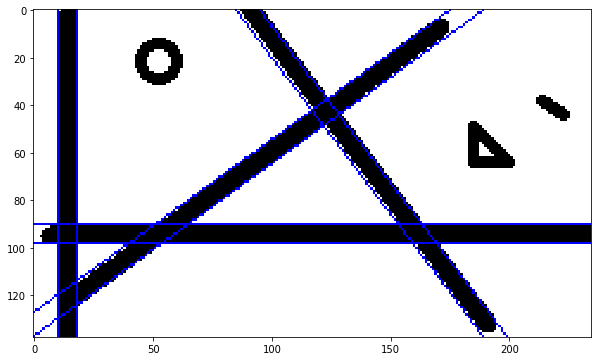

In [9]:
# get indices of acc_mat_th
edge_inds = np.argwhere(acc_mat_th > 0)

res = im3.copy()
for r_ind, t_ind in edge_inds:
    rho = r[r_ind]
    theta = t[t_ind]

    print("(rho,theta): " + str((rho, theta/np.pi*180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Try cv2.HoughLines
This implementation is faster since it was done in C 


(rho,theta): (98.0, 90.00000250447816)
(rho,theta): (90.0, 90.00000250447816)
(rho,theta): (-69.0, 142.9999960107835)
(rho,theta): (-77.0, 142.9999960107835)
(rho,theta): (10.0, 0.0)
(rho,theta): (103.0, 53.99999808759232)
(rho,theta): (111.0, 53.99999808759232)
(rho,theta): (18.0, 0.0)


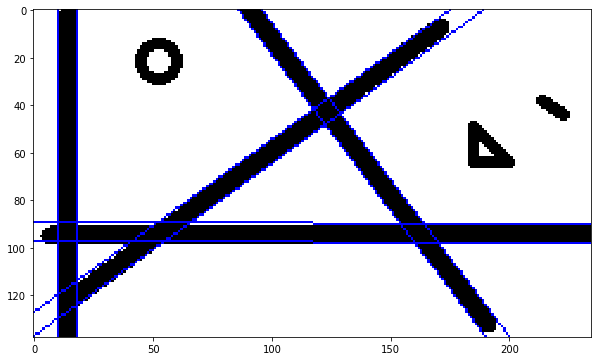

In [10]:
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    print("(rho,theta): " + str((rho, theta/np.pi*180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Complete new example of a more complex image
We can see on the bottom horizontal lines that the "noise" of the tree top edges is interfeering with the line detection.


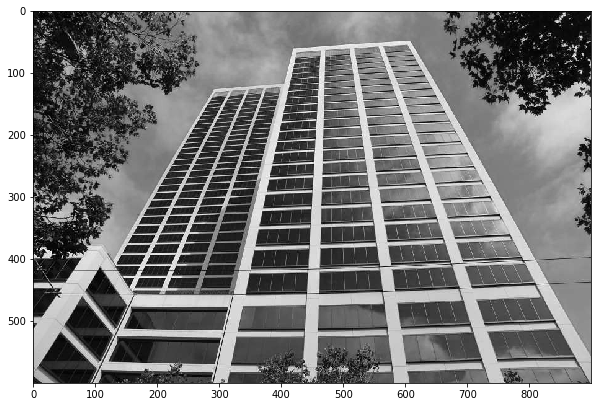

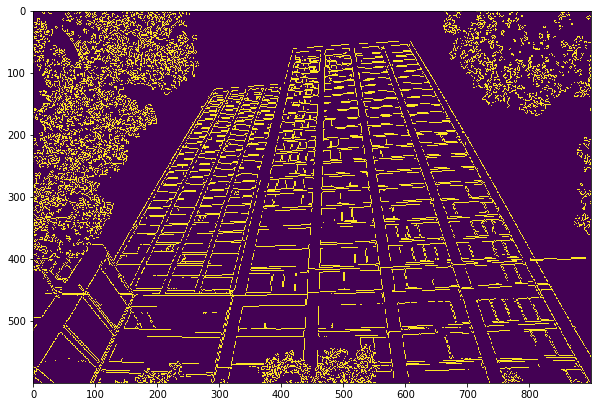

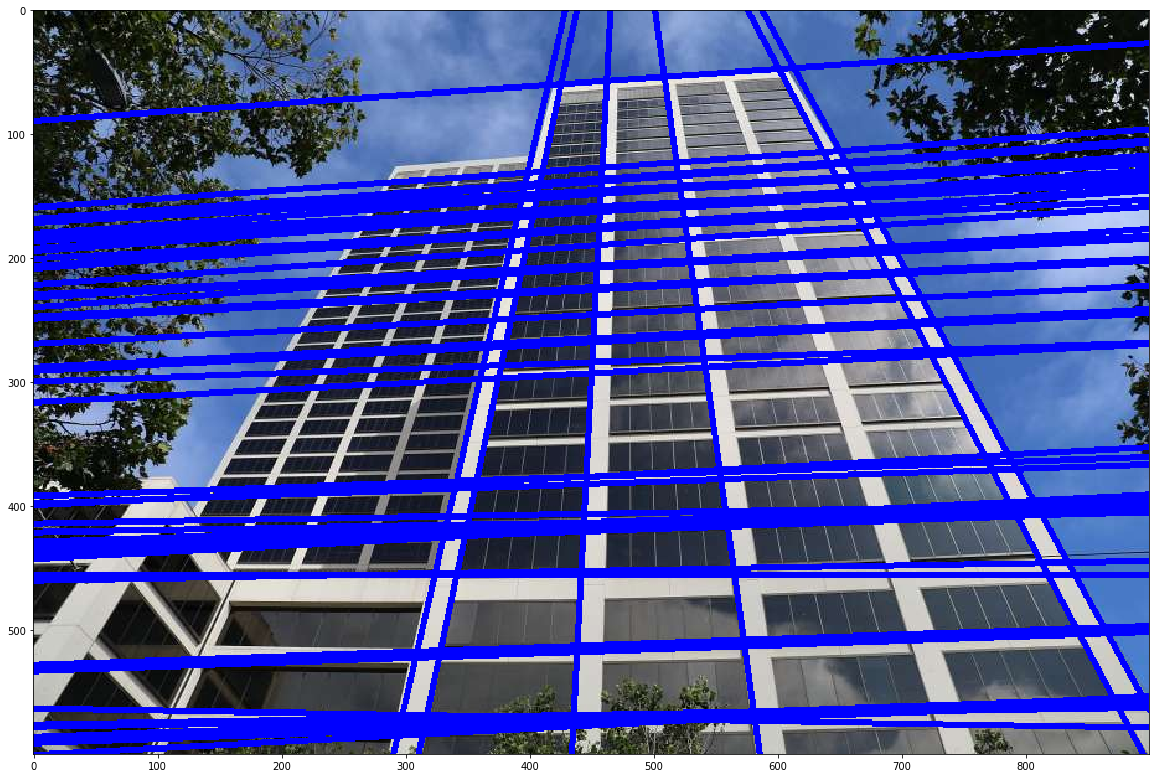

In [11]:
im3 = cv2.imread("building.jpg")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()

TH = 247
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)

plt.figure(figsize=(20, 20))
plt.imshow(res)
plt.show()

